<a href="https://colab.research.google.com/github/swati1504/ADVANCED-DEEP-LEARNING-AND-COMPUTER-VISION/blob/main/Color_Image_to_Pencil_Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#Install imageio package
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp
import cv2 as cv
from skimage import io

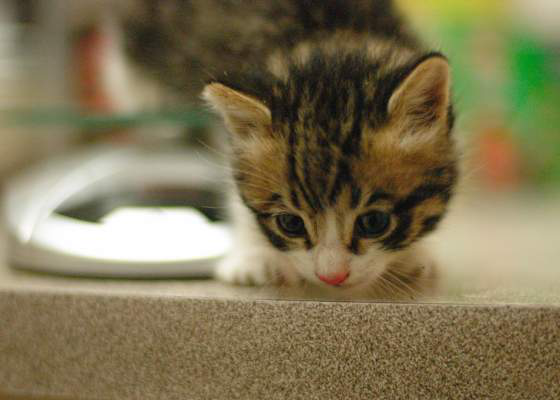

In [95]:
#LOAD IMAGE
url = "https://placekitten.com/560/400"
image = io.imread(url)  
cv2_imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

In [96]:
# Make the image Black and White using the formula Y= 0.299*R + 0.587*G + 0.114*B i.e. applying grayscale
import numpy as np

def grayscaleimg(rgb): 
  return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

gray_image = grayscaleimg(image)

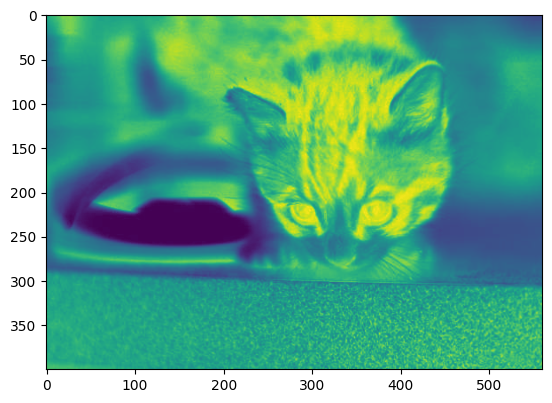

In [97]:
#Invert the image by subtracting it from 255
inv_img = (255 - gray_image)
plt.imshow(inv_img)

<ipython-input-98-1c3f4d28fc51>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)


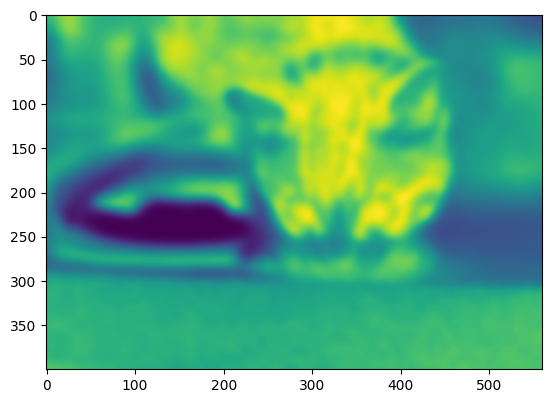

In [98]:
#Blur the image using gaussian filter
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [99]:
#Create function to perform dogding(belnding together greyscale and blurred image)
def dodging(blur_img, gray_image):
    resultant_dodge=blur_img*255/(255-gray_image) 
    resultant_dodge[resultant_dodge>255]=255
    resultant_dodge[gray_image==255]=255
    return resultant_dodge.astype('uint8')

In [100]:
#Generate the target image by applying the dodge
target_img= dodging(blurred_img, gray_image)

<ipython-input-99-fd49641d06dd>:3: RuntimeWarning: divide by zero encountered in true_divide
  resultant_dodge=blur_img*255/(255-gray_image)


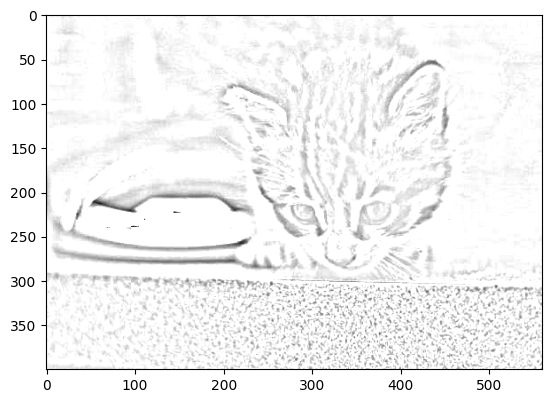

In [101]:
#Display the target image
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap="gray")